# Operacoes basicas nas colunas + missing data

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

df = pd.read_pickle('teste.pickle')
df.tail()

,user_id,song_id,contagem,artista
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,Queens Of The Stone Age
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Rob Zombie
1116608,276e43ad698705e5011e5091f367d951b21246f5,SOYRMVO12A6701D106,1,Godsmack
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2,Vive la Fete
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50,Diplo


In [33]:
NaN = float('nan')
new = pd.DataFrame({'user_id':['b80344d063b5ccb3212f76538f3d9e43d87dca9e', 'b80344d063b5ccb3212f76538f3d9e43d87dca9e'],
                       'song_id': ['SOAKIMP12A2C130993','SOAKIMP22A8D130992'],
                       'contagem':[NaN,NaN],
                       'artista': ['Madona', 'Eminen']},
                   index=[1116611, 1116612])
cols = new.columns.tolist()
new= new[cols[::-1]]
new.head()

,user_id,song_id,contagem,artista
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen


In [34]:
frames = [df,new]
df = pd.concat(frames)
df.tail()

,user_id,song_id,contagem,artista
1116608,276e43ad698705e5011e5091f367d951b21246f5,SOYRMVO12A6701D106,1.0,Godsmack
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen


In [35]:
#criando nova coluna com os dados da coluna contagem
df['contagem_norm'] = df['contagem']*1/np.sum(df['contagem'])
df.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116608,276e43ad698705e5011e5091f367d951b21246f5,SOYRMVO12A6701D106,1.0,Godsmack,2.721419e-07
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442837e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360709e-05
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona,NaN
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen,NaN


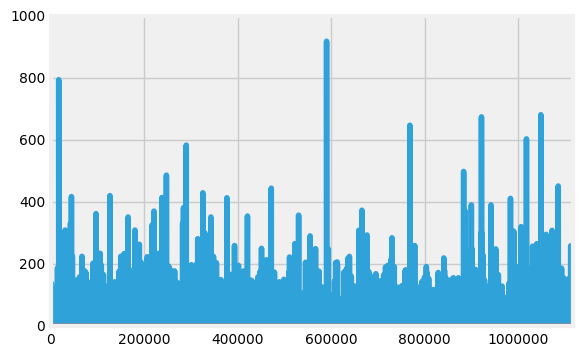

In [36]:
df.plot(legend=None)
plt.show()

# Lidando com missing data

In [9]:
new_music = pd.DataFrame({'contagem':[2,50,78,2],
                          'artista': ['Madona', 'Eminen','Caetano Veloso', 'Cartola']})
df = df.join(new_music,lsuffix='_df',rsuffix='_new_music')
df.tail()

,user_id,song_id,contagem_df,artista_df,contagem_norm,artista_new_music,contagem_new_music,artista,contagem
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,Queens Of The Stone Age,1.904993e-06,NaN,NaN,NaN,NaN
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Rob Zombie,2.721419e-07,NaN,NaN,NaN,NaN
1116608,276e43ad698705e5011e5091f367d951b21246f5,SOYRMVO12A6701D106,1,Godsmack,2.721419e-07,NaN,NaN,NaN,NaN
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2,Vive la Fete,5.442837e-07,NaN,NaN,NaN,NaN
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50,Diplo,1.360709e-05,NaN,NaN,NaN,NaN
